In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.9.2


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

train_images = train_images / 255.0
test_images = test_images / 255.0

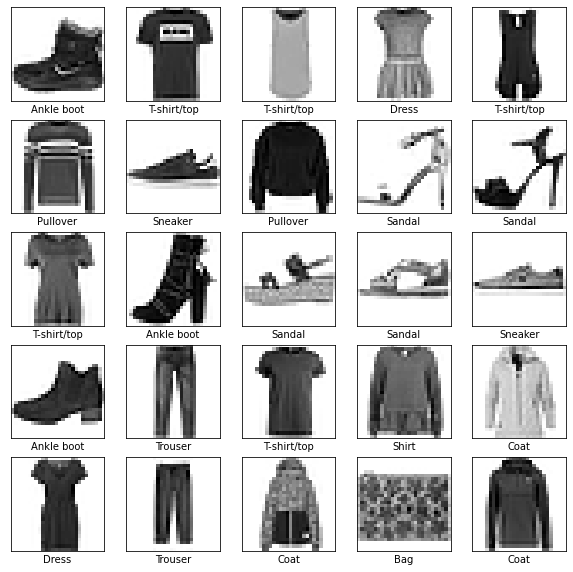

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4997 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3751 - accuracy: 0.8659
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3366 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3108 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2908 - accuracy: 0.8934
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2778 - accuracy: 0.8979
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2661 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2555 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2454 - accuracy: 0.9095
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.237

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy: ', test_acc)

313/313 - 1s - loss: 0.3451 - accuracy: 0.8828 - 602ms/epoch - 2ms/step

Test Accuracy:  0.8827999830245972


In [13]:
predictions = model.predict(test_images)

predictions[0]

313/313 [==============================] - 1s 2ms/step


array([3.1619587e-07, 8.2154873e-12, 5.6098976e-08, 2.4746114e-12,
       7.4270292e-07, 3.9786549e-04, 1.7270451e-06, 1.1707682e-02,
       1.3099525e-07, 9.8789132e-01], dtype=float32)

In [24]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

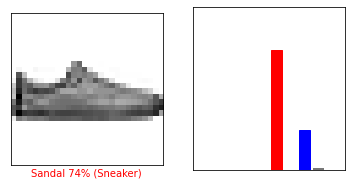

In [25]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

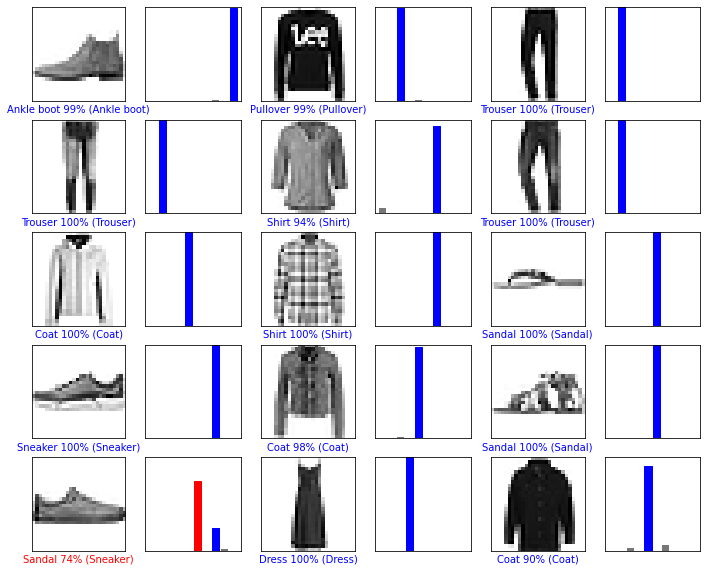

In [26]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()